In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('Datasets/bike_buyers.csv')
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [85]:
data = df.drop(['ID', 'Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region'], inplace=False, axis=1)
data.head()

,Income,Children,Cars,Age,Purchased Bike
0,40000.0,1.0,0.0,42.0,No
1,30000.0,3.0,1.0,43.0,No
2,80000.0,5.0,2.0,60.0,No
3,70000.0,0.0,1.0,41.0,Yes
4,30000.0,0.0,0.0,36.0,Yes


In [86]:
# delete data with NaN value
df.dropna(inplace=True)

In [87]:
import sklearn
from sklearn.model_selection import train_test_split

# split into attribute and label
x = df[['Children', 'Cars']]
y = df['Purchased Bike']

# split the data into train and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
len(x_test), len(x_train)

(191, 761)

# Decision Tree

[Text(179.955, 203.85, 'X[1] <= 1.5\nentropy = 0.999\nsamples = 761\nvalue = [397, 364]'),
 Text(84.68470588235294, 176.67000000000002, 'X[0] <= 3.5\nentropy = 0.981\nsamples = 384\nvalue = [161, 223]'),
 Text(51.20470588235294, 149.49, 'X[0] <= 2.5\nentropy = 0.972\nsamples = 341\nvalue = [137, 204]'),
 Text(31.51058823529412, 122.31, 'X[1] <= 0.5\nentropy = 0.978\nsamples = 303\nvalue = [125, 178]'),
 Text(15.75529411764706, 95.13, 'X[0] <= 0.5\nentropy = 0.967\nsamples = 132\nvalue = [52, 80]'),
 Text(7.87764705882353, 67.94999999999999, 'entropy = 0.747\nsamples = 47\nvalue = [10, 37]'),
 Text(23.632941176470588, 67.94999999999999, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 85\nvalue = [42, 43]'),
 Text(15.75529411764706, 40.77000000000001, 'entropy = 1.0\nsamples = 56\nvalue = [28, 28]'),
 Text(31.51058823529412, 40.77000000000001, 'entropy = 0.999\nsamples = 29\nvalue = [14, 15]'),
 Text(47.265882352941176, 95.13, 'X[0] <= 0.5\nentropy = 0.985\nsamples = 171\nvalue = [73, 98]'),
 Tex

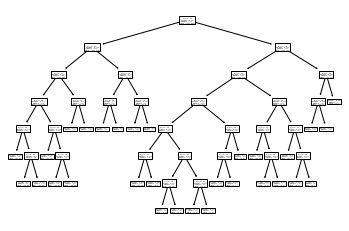

In [88]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# create model
model_tree = DecisionTreeClassifier(criterion='entropy')
# training model
model_tree.fit(x_train, y_train)
# show tree
tree.plot_tree(model_tree)

In [89]:
# Predict Model
pred_tree = model_tree.predict(x_test)

# Evaluate using dataset
accuracy = (pred_tree == y_test).sum()/len(y_test)
accuracy

0.675392670157068

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_tree, y_test)
cm

array([[83, 46],
       [16, 46]])

In [91]:
data2 = df[['ID','Marital Status', 'Gender', 'Region', 'Education', 'Occupation', 'Purchased Bike']]
data2

,ID,Marital Status,Gender,Region,Education,Occupation,Purchased Bike
0,12496,Married,Female,Europe,Bachelors,Skilled Manual,No
1,24107,Married,Male,Europe,Partial College,Clerical,No
2,14177,Married,Male,Europe,Partial College,Professional,No
4,25597,Single,Male,Europe,Bachelors,Clerical,Yes
5,13507,Married,Female,Europe,Partial College,Manual,No
...,...,...,...,...,...,...,...
994,13466,Married,Male,North America,Partial College,Professional,No
995,23731,Married,Male,North America,High School,Professional,Yes
996,28672,Single,Male,North America,Graduate Degree,Professional,Yes
998,19664,Single,Male,North America,Bachelors,Management,No


In [92]:
d = {'Yes':True, 'No':False}
df['Purchased Bike'] = df['Purchased Bike'].map(d)

In [93]:
from info_gain import info_gain

data2_atr = data2.columns
feature = data2_atr[0:-1]
print(feature)

Index(['ID', 'Marital Status', 'Gender', 'Region', 'Education', 'Occupation'], dtype='object')


In [94]:
IG, IV, IGR = [], [], []

for i in feature:
    temp_ig = info_gain.info_gain(data2['Purchased Bike'], data2[i])
    temp_iv = info_gain.info_gain(data2['Purchased Bike'], data2[i])
    temp_igr = info_gain.info_gain(data2['Purchased Bike'], data2[i])
    print(f"{i} : \n Information Gain \t : {temp_ig} \n Interistict Value \t : {temp_iv} \n Information Gain Ratio  : {temp_igr}")
    IG.append(temp_ig)
    IV.append(temp_iv)
    IGR.append(temp_igr)


ID : 
 Information Gain 	 : 0.6922642146294702 
 Interistict Value 	 : 0.6922642146294702 
 Information Gain Ratio  : 0.6922642146294702
Marital Status : 
 Information Gain 	 : 0.00563057814475143 
 Interistict Value 	 : 0.00563057814475143 
 Information Gain Ratio  : 0.00563057814475143
Gender : 
 Information Gain 	 : 0.0001740993591368145 
 Interistict Value 	 : 0.0001740993591368145 
 Information Gain Ratio  : 0.0001740993591368145
Region : 
 Information Gain 	 : 0.006677726799669381 
 Interistict Value 	 : 0.006677726799669381 
 Information Gain Ratio  : 0.006677726799669381
Education : 
 Information Gain 	 : 0.013151618019806355 
 Interistict Value 	 : 0.013151618019806355 
 Information Gain Ratio  : 0.013151618019806355
Occupation : 
 Information Gain 	 : 0.004615862919425839 
 Interistict Value 	 : 0.004615862919425839 
 Information Gain Ratio  : 0.004615862919425839
